In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import numpy as np

2023-11-18 18:10:25.163532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 18:10:26.219200: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 18:10:26.219278: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 18:10:26.221663: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 18:10:26.329313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 18:10:26.331132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
def crop(a, b):
    a, b = sorted([a, b])
    return [int((b-a)/2), int(b-(b-a)/2)]

In [4]:
input_shape=(572, 572, 3)
inputs = layers.Input(input_shape)

# CONTRACTING PATH

x = layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape)(inputs)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

x_save_1 = x 
#print("x_save_1: ", x_save_1.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

x_save_2 = x 
#print("x_save_2: ", x_save_2.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

x_save_3 = x 
#print("x_save_3: ", x_save_3.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)

x_save_4 = x 
#print("x_save_4: ", x_save_4.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(1024, (3, 3), activation='relu')(x)
x = layers.Conv2D(1024, (3, 3), activation='relu')(x)

# EXPANDING PATH

x = layers.Conv2DTranspose(1024, (3, 3), strides = (2, 2), padding = 'same')(x)
a, b = crop(64, 56)
x = layers.concatenate([x_save_4[:, a:b, a:b, :], x])

x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.Conv2DTranspose(512, (3, 3), strides = (2, 2), padding = 'same')(x)
a, b = crop(136, 104)
x = layers.concatenate([x_save_3[:, a:b, a:b, :], x])

x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)

x = layers.Conv2DTranspose(256, (3, 3), strides = (2, 2), padding = 'same')(x)
a, b = crop(280, 200)
x = layers.concatenate([x_save_2[:, a:b, a:b, :], x])

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

x = layers.Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same')(x)
a, b = crop(568, 392)
x = layers.concatenate([x_save_1[:, a:b, a:b, :], x])

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

x = layers.Conv2D(2, (1, 1), activation='relu')(x)

###########################
model = Model(inputs, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 572, 572, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 570, 570, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 568, 568, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 284, 284, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [77]:
def crop(a, b):
    a, b = sorted([a, b])
    return [int((b-a)/2), int(b-(b-a)/2)]

print(crop(64, 56))
print(crop(136, 104))
print(crop(280, 200))
print(crop(568, 392))

[4, 60]
[16, 120]
[40, 240]
[88, 480]


In [17]:
def conv_block(x):
    x -= 2
    print(x)
    x -= 2
    print(x)
    x /= 2
    print(x)
    return x

def upconv_block(x):
    x *= 2
    print(x)
    x -= 2
    print(x)
    x -= 2
    print(x)
    return x


def generate_dims(x):
    print(x)
    for _ in range(4):
        x = conv_block(x)
    x -= 2
    x -=2
    for _ in range(4):
        x = upconv_block(x)
    print(x)

In [18]:
# dimensions in input has shape (572, 572, 3)
generate_dims(572)

572
570
568
284.0
282.0
280.0
140.0
138.0
136.0
68.0
66.0
64.0
32.0
56.0
54.0
52.0
104.0
102.0
100.0
200.0
198.0
196.0
392.0
390.0
388.0
388.0


In [20]:
# dimensions in input has shape (256, 256, 3)
generate_dims(256)

256
254
252
126.0
124.0
122.0
61.0
59.0
57.0
28.5
26.5
24.5
12.25
16.5
14.5
12.5
25.0
23.0
21.0
42.0
40.0
38.0
76.0
74.0
72.0
72.0


In [4]:
input_shape=(256, 256, 3)
inputs = layers.Input(input_shape)

# CONTRACTING PATH

x = layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape)(inputs)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

x_save_1 = x 
#print("x_save_1: ", x_save_1.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

x_save_2 = x 
#print("x_save_2: ", x_save_2.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

x_save_3 = x 
#print("x_save_3: ", x_save_3.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)

x_save_4 = x 
#print("x_save_4: ", x_save_4.shape)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(1024, (3, 3), activation='relu')(x)
x = layers.Conv2D(1024, (3, 3), activation='relu')(x)

model = Model(inputs, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 252, 252, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 124, 124, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 128)     147584    
                                                             

In [6]:
8*2

16

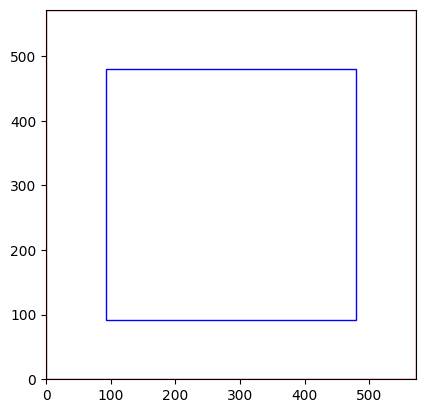

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the outer square (572 by 572)
outer_square = patches.Rectangle((0, 0), 572, 572, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(outer_square)

# Draw the inner square (388 by 388) inside the outer square
inner_square = patches.Rectangle((92, 92), 388, 388, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(inner_square)

# Set axis limits
ax.set_xlim(0, 572)
ax.set_ylim(0, 572)

# Set aspect ratio to be equal
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()


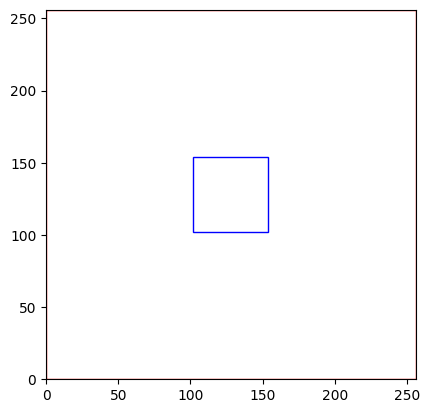

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the outer square (256 by 256)
outer_square = patches.Rectangle((0, 0), 256, 256, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(outer_square)

# Draw the inner square (52 by 52) inside the outer square
inner_square = patches.Rectangle((102, 102), 52, 52, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(inner_square)

# Set axis limits
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)

# Set aspect ratio to be equal
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()
